In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import pprint
import sys
import astropy.io.fits as pyfits
import MockImageFunctions
from matplotlib.colors import LogNorm
import subprocess
import os 
import shutil 
from scipy import ndimage
import traceback

original skirt (200, 500, 500)
1.65308596 arcsec


-22.743575142078985
-1.2973770668011696e-20


/tmp/ipykernel_3406683/2927303795.py:12: RuntimeWarning: invalid value encountered in log10
  print(np.nanmin(np.log10(testimsum)))


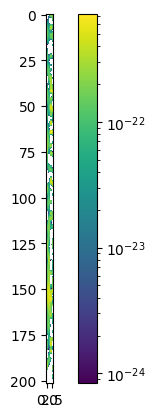

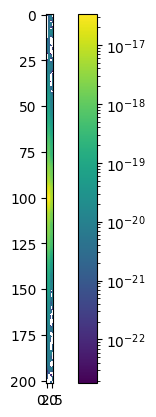

In [2]:
%matplotlib inline
testim = np.load('/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters478489_1.npy')
testimsum = np.sum(testim, axis = 0)
# print(np.shape(np.sum(testim, axis = 0)))
# print(np.min(testim))
# print(np.min(np.sum(testim, axis = 0)))
# print(np.log10(np.min(np.sum(testim, axis = 0))))
# print(np.max(testim))
# print(np.max(np.sum(testim, axis = 0)))
# print(np.log10(np.max(np.sum(testim, axis = 0))))

print(np.nanmin(np.log10(testimsum)))
print(np.nanmin(testimsum))

plt.figure()
plt.imshow(testim[3], norm = LogNorm())
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(testimsum, norm = LogNorm())
plt.colorbar()
plt.show()


#print(np.min(testim - np.min(testim)))
# print(np.shape(testim[0]))
# plt.figure()
# plt.imshow(abs(np.sum(testim - np.min(testim), axis = 2))/np.max(testim - np.min(testim)), norm = LogNorm())
# plt.colorbar()

# testim = testim - np.min(testim)
# testimnorm = testim/np.max(testim)
# print(np.min(testimnorm), np.max(testimnorm))
# print(np.shape(testimnorm))

# plt.figure()
# plt.imshow(abs(np.sum(testimnorm, axis=2)))
# plt.colorbar()

0.0 1.0


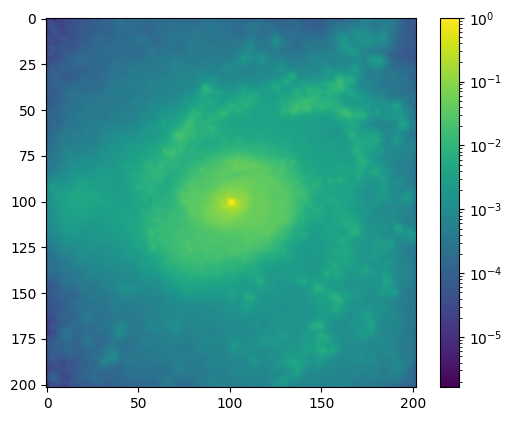

In [3]:
test2 = np.load('/n/holystore01/LABS/hernquist_lab/Users/aschechter/z1mocks/training/mergers/allfilters110864_1.npy')

test2 = np.sum(test2, axis = 2)
test2 = test2 - np.min(test2)
test2 = test2/np.max(test2)
print(np.min(test2), np.max(test2))
plt.imshow(test2, norm=LogNorm())
plt.colorbar()

In [4]:
#read in subhalos, viewpoints, RA and Dec of backgrounds, and mock images
SandV = pd.read_csv('SubhaloList_WithBackgroundCoords_ForMakeMocks50.csv')


bpath ='/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/z15'
mockspath = '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground/_z15'

SandV

#type = 0.0 is a non merger

FileNotFoundError: [Errno 2] No such file or directory: 'SubhaloList_WithBackgroundCoords_ForMakeMocks50.csv'

In [5]:
backs125 = glob.glob(bpath + 'wfc3_ir_f125w' + '*.fits')
print(len(backs125))
print(backs125[0][83:])
backs125_sample = np.random.choice(backs125, len(SandV), replace = False)
print(len(backs125_sample))
backcoords = []
for i in range(len(SandV)):
    c = backs125_sample[i][83:]
    backcoords.append(c)
    
np.savetxt('BackgroundsUsed.txt', backcoords, fmt="%s")

SandV['BackgroundCoords'] = backcoords
SandV

0


IndexError: list index out of range

In [ ]:
missingsubids = []
filtercounter = 0
totcounter = 0
for index, row in SandV.iterrows():
    try:
        subid = row['Subfind_ID']; viewpoint = row['Viewpoint']; classification = row['Type']; coord = row['BackgroundCoords']
        COSMOSfilters = ['wfc3_ir_f125w', 'wfc3_ir_f160w', 'acs_wfc_f814w', 'acs_wfc_f606w']
        for f in COSMOSfilters:
            #print(f)
            skirt = np.load(mockspath + str(subid) + '_' + str(viewpoint) + f + '.npy')
            #print('skirt', f, np.shape(skirt))
            background = bpath + f + coord
            backgroundim = pyfits.open(background)
            bdata = backgroundim[0].data
            #print('bdata', f, np.shape(bdata))
            fullmock = skirt+bdata
            np.save('/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/full' + '_' + str(subid) + '_' + str(viewpoint) + '_' + f + '.npy', fullmock)
            filtercounter +=1
        totcounter +=1
    except:
        #print(subid)
        missingsubids.append(subid)

print(filtercounter)
print(filtercounter/4)
print(totcounter)

In [ ]:
SandV['Type'][3000]

In [ ]:
# counter = 0
# for s in range(len(SandV)):
#     if SandV['Type'][s] == str(0.0) and SandV['Subfind_ID'][s] in missingsubids:
#         counter += 1
# print(counter, len(missingsubids))

In [ ]:
nonmergers = glob.glob('/n/holylfs05/LABS/hernquist_lab/Lab/xshen/galaxy_merger_images/TNG50-1/nonmergers')

In [ ]:
testmock = np.load(mockspath+'94872_6wfc3_ir_f160w.npy')
print(np.shape(testmock))
plt.figure()
plt.imshow(testmock, norm = LogNorm())
plt.show()

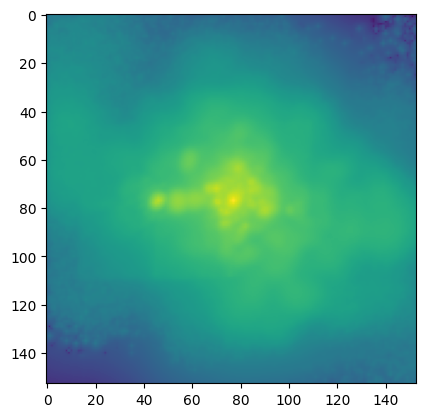

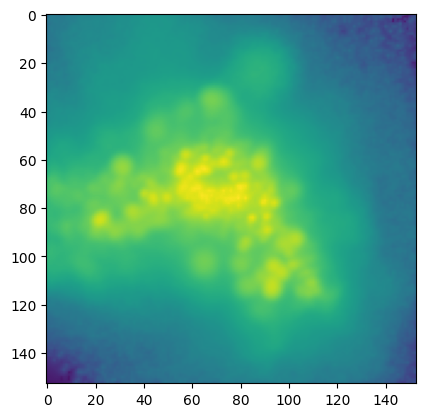

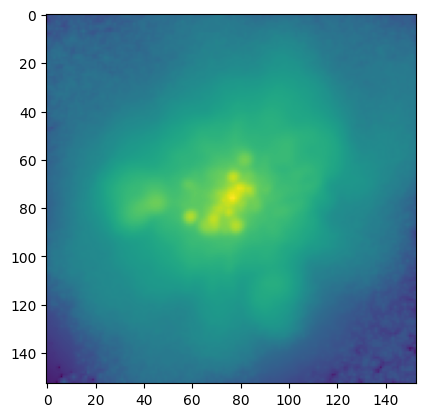

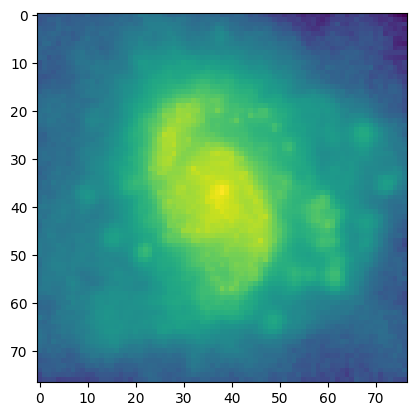

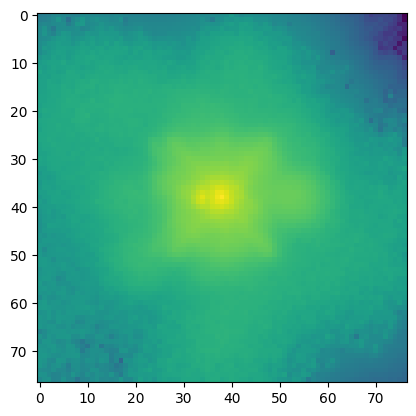

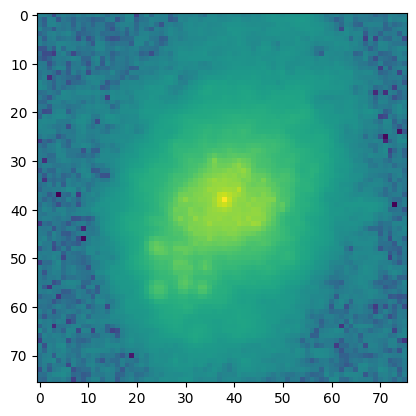

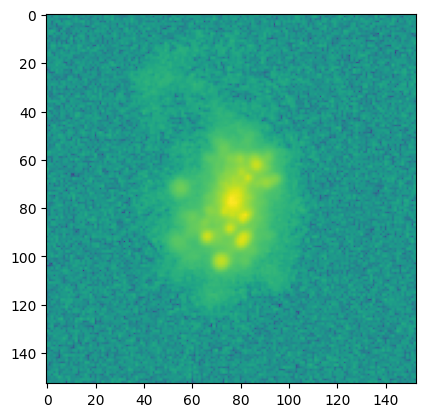

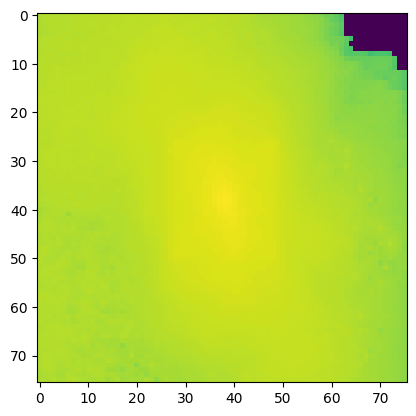

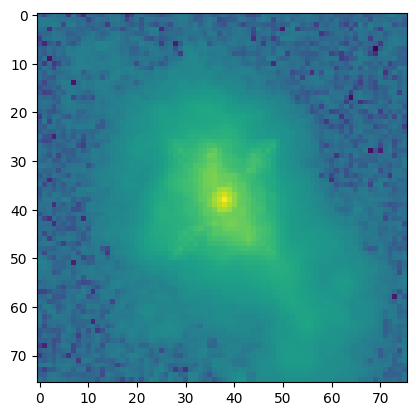

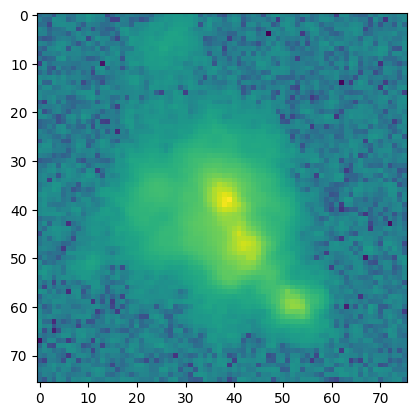

In [12]:
skirtmockspath = '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground_z15/*.npy'
fullmockspath = '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/*.npy'
skirtmocks = glob.glob(skirtmockspath)
fullmocks = glob.glob(fullmockspath)
for f in skirtmocks[0:5]:
    image = np.load(f)
    plt.imshow(abs(image), norm = LogNorm())
    plt.show()
for f in fullmocks[0:5]:
    image = np.load(f)
    plt.imshow(abs(image), norm = LogNorm())
    plt.show()

In [ ]:
im1 = '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/full_486383_2_acs_wfc_f814w.npy'
im2 = '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground/486383_2acs_wfc_f814w.npy'
fim1 = np.load(im1)
sim2 = np.load(im2)


plt.figure()
plt.imshow(abs(sim2), norm = LogNorm())
plt.show()

plt.figure()
plt.imshow(abs(fim1), norm = LogNorm())
plt.show()

In [6]:
SubIDs_norepeats = [*set(SandV['Subfind_ID'])]
print('len SubIDs ', len(SubIDs_norepeats))

test_set_IDs = np.random.choice(SubIDs_norepeats, size = int(len(SubIDs_norepeats)*0.15), replace = False)
print('test ', len(test_set_IDs))
trainval = []
why = 0
for t in SubIDs_norepeats:
    #print('ID = ', t)
    if t in test_set_IDs:
        why +=1
    else: 
        trainval.append(t)
trainval = np.array(trainval)
print('trainval ', len(trainval))
print(len(SubIDs_norepeats) - len(test_set_IDs))
print(why)

len SubIDs  892
test  133
trainval  759
759
133


In [7]:
val_set_IDs = np.random.choice(trainval, size = int(len(test_set_IDs)), replace = False)
train_set_IDs = []
why2 = 0 
for v in trainval:
    if v in val_set_IDs:
        why2 +=1
    else:
        train_set_IDs.append(v)
train_set_IDs = np.array(train_set_IDs)

print(len(test_set_IDs), len(val_set_IDs), len(train_set_IDs))

133 133 626


In [8]:
SetAssignment = np.zeros(len(SandV['Subfind_ID']), dtype=object)
for i in range(len(SandV['Subfind_ID'])):
    if SandV['Subfind_ID'][i] in train_set_IDs:
        SetAssignment[i] = 'Training'
    elif SandV['Subfind_ID'][i] in val_set_IDs:
        SetAssignment[i] = 'Validation'
    elif SandV['Subfind_ID'][i] in test_set_IDs:
        SetAssignment[i] = 'Test'
np.set_printoptions(threshold=sys.maxsize)
print(len(SetAssignment))
SandV['Set Assignment'] = SetAssignment

5352


In [9]:
SandV
CNNMocksInfo = SandV.copy()
CNNMocksInfo.to_csv('CNNMocksInfo_z15.csv', index = False)
print(len(CNNMocksInfo))

5352


In [10]:
CNNMocksInfo

,Unnamed: 0.1,Unnamed: 0,Subfind_ID,Viewpoint,Type,RA Dec,Set Assignment
0,0,0,289514,1,Descendant,_150.1383153155_2.3899806066,Validation
1,1,1,289514,2,Descendant,_150.190772546_2.6287380182,Validation
2,2,2,289514,3,Descendant,_150.2079228614_2.0768122813,Validation
3,3,3,289514,4,Descendant,_150.1890253468_2.3808956269,Validation
4,4,4,289514,5,Descendant,_150.1510257946_2.3681638886,Validation
...,...,...,...,...,...,...,...
5347,5347,5347,637071,2,0.0,_150.1253376682_2.4295635664,Training
5348,5348,5348,637071,3,0.0,_150.2222440013_2.4778417682,Training
5349,5349,5349,637071,4,0.0,_150.2232982015_2.2904607206,Training
5350,5350,5350,637071,5,0.0,_150.1243207669_2.5547936452,Training


In [ ]:
fullmockspath =  '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/'
for index, row in CNNMocksInfo.iterrows():
    subid = row['Subfind_ID']; viewpoint = row['Viewpoint']; classification = row['Type']; setassignment = row['Set Assignment']
    allfilters = glob.glob(fullmockspath + 'full_' + str(subid) + '_' + str(viewpoint) + '*.npy')
    #print(len(allfilters))
    try:
        for f in allfilters:
            if 'f606w' in f:
                #print('yes')
                a = np.load(f)
            elif 'f814w' in f:
                b = np.load(f)
            elif 'f125w' in f:
                g = np.load(f)
            elif 'f160w' in f:
                r = np.load(f)
        #r = np.load(allfilters[0]); b = np.load(allfilters[1]); c = np.load(allfilters[2]); d = np.load(allfilters[3])
        imlist = np.array((r,g,b,a))
        imlist_use = []
        for i in imlist:
            if np.shape(i) == (202,202):
                imlist_use.append(i)
            elif np.shape(i) == (101, 101):
                imuse = ndimage.zoom(i, 2)
                #print(np.shape(imuse))
                imlist_use.append(imuse)
        #print(np.shape(a),np.shape(b),np.shape(c),np.shape(d))
        stack = np.dstack(imlist_use)
        np.save(fullmockspath + 'allfilters' + str(subid)  + '_' + str(viewpoint) + '.npy', stack)

    except:
        print(subid, viewpoint)


/tmp/ipykernel_3546033/2502503716.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imlist = np.array((r,g,b,a))


289514 1
289514 2
289514 3
289514 4
289514 5
289514 6
340254 1
340254 2
340254 3
340254 4
340254 5
340254 6
348021 1
348021 2
348021 3
348021 4
348021 5
348021 6
349693 1
349693 2
349693 3
349693 4
349693 5
349693 6
457772 1
457772 2
457772 3
457772 4
457772 5
457772 6
502664 1
502664 2
502664 3
502664 4
502664 5
502664 6
544171 1
544171 2
544171 3
544171 4
544171 5
544171 6
87012 1
87012 2
87012 3
87012 4
87012 5
87012 6
269431 1
269431 2
269431 3
269431 4
269431 5
269431 6
356260 1
356260 2
356260 3
356260 4
356260 5
356260 6
457526 1
457526 2
457526 3
457526 4
457526 5
457526 6
474784 1
474784 2
474784 3
474784 4
474784 5
474784 6
493478 1
493478 2
493478 3
493478 4
493478 5
493478 6
586133 1
586133 2
586133 3
586133 4
586133 5
586133 6
36234 1
36234 2
36234 3
36234 4
36234 5
36234 6
36236 1
36236 2
36236 3
36236 4
36236 5
36236 6
51932 1
51932 2
51932 3
51932 4
51932 5
51932 6
62930 1
62930 2
62930 3
62930 4
62930 5
62930 6
93692 1
93692 2
93692 3
93692 4
93692 5
93692 6
110115 1
1

In [ ]:
# tstack = np.load(fullmockspath + 'full_577921_5allfilters.npy')
# np.shape(tstack)
# #print(tstack)

In [10]:
fullmockspath =  '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/'
fullmockslist = os.listdir(fullmockspath)
print(fullmockslist[0])

full_439505_6_wfc3_ir_f125w.npy


In [12]:
for index, row in CNNMocksInfo.iterrows():
    subid = row['Subfind_ID']; viewpoint = row['Viewpoint']; classification = row['Type']; setassignment = row['Set Assignment']
    try:
        source = fullmockspath + 'allfilters' + str(subid) + '_' + str(viewpoint) + '.npy'
        if setassignment == 'Training': 
            destination = "/n/holystore01/LABS/hernquist_lab/Users/aschechter/z15mocks/training/"
            if classification == '0.0':
                shutil.move(source, destination + 'nonmergers/')
            elif classification == 'Merger':
                shutil.move(source, destination + 'mergers/')
            elif classification == 'Descendant':
                shutil.move(source, destination + 'latemergers/')
            elif classification == 'first_progenitor' or classification == 'next_progenitor':
                shutil.move(source, destination + 'earlymergers/')

        elif setassignment == 'Validation': 
            destination = "/n/holystore01/LABS/hernquist_lab/Users/aschechter/z15mocks/validation/"
            if classification == '0.0':
                shutil.move(source, destination + 'nonmergers/')
            elif classification == 'Merger':
                shutil.move(source, destination + 'mergers/')
            elif classification == 'Descendant':
                shutil.move(source, destination + 'latemergers/')
            elif classification == 'first_progenitor' or classification == 'next_progenitor':
                shutil.move(source, destination + 'earlymergers/')
        elif setassignment == 'Test':
            destination = "/n/holystore01/LABS/hernquist_lab/Users/aschechter/z15mocks/test/"
            if classification == '0.0':
                shutil.move(source, destination + 'nonmergers/')
            elif classification == 'Merger':
                shutil.move(source, destination + 'mergers/')
            elif classification == 'Descendant':
                shutil.move(source, destination + 'latemergers/')
            elif classification == 'first_progenitor' or classification == 'next_progenitor':
                shutil.move(source, destination + 'earlymergers/')
    except Exception as e:
            # Print error and traceback
            print(f"Error processing Subfind_ID {subid} and Viewpoint {viewpoint}:")
            print(f"Exception: {e}")
            traceback.print_exc()  # This will give you a detailed stack trace

Error processing Subfind_ID 0 and Viewpoint 1:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters0_1.npy'
Error processing Subfind_ID 0 and Viewpoint 2:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters0_2.npy'
Error processing Subfind_ID 0 and Viewpoint 3:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters0_3.npy'
Error processing Subfind_ID 0 and Viewpoint 4:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters0_4.npy'
Error processing Subfind_ID 0 and Viewpoint 5:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters0_5.npy'
Error processing Subfind_ID 0 and Viewpoint 6:
Exception: [Errno 2] No such file or directory: '/n/h

Traceback (most recent call last):
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 791, in move
    os.rename(src, real_dst)
FileNotFoundError: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters0_1.npy' -> '/n/holystore01/LABS/hernquist_lab/Users/aschechter/z15mocks/training/earlymergers/allfilters0_1.npy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/tmp/ipykernel_3551131/3071224179.py", line 14, in <cell line: 1>
    shutil.move(source, destination + 'earlymergers/')
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 811, in move
    copy_function(src, real_dst)
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 435, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 264, in copyfile
  

Error processing Subfind_ID 15216 and Viewpoint 1:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters15216_1.npy'
Error processing Subfind_ID 15216 and Viewpoint 2:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters15216_2.npy'
Error processing Subfind_ID 15216 and Viewpoint 3:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters15216_3.npy'
Error processing Subfind_ID 15216 and Viewpoint 4:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters15216_4.npy'
Error processing Subfind_ID 15216 and Viewpoint 5:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters15216_5.npy'
Error processing Subfind_ID 15216 and Viewpoint 6:
Exception

Traceback (most recent call last):
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 791, in move
    os.rename(src, real_dst)
FileNotFoundError: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters15216_1.npy' -> '/n/holystore01/LABS/hernquist_lab/Users/aschechter/z15mocks/training/nonmergers/allfilters15216_1.npy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/tmp/ipykernel_3551131/3071224179.py", line 8, in <cell line: 1>
    shutil.move(source, destination + 'nonmergers/')
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 811, in move
    copy_function(src, real_dst)
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 435, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 264, in copyfile

Error processing Subfind_ID 136 and Viewpoint 1:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters136_1.npy'
Error processing Subfind_ID 136 and Viewpoint 2:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters136_2.npy'
Error processing Subfind_ID 136 and Viewpoint 3:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters136_3.npy'
Error processing Subfind_ID 136 and Viewpoint 4:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters136_4.npy'
Error processing Subfind_ID 136 and Viewpoint 5:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters136_5.npy'
Error processing Subfind_ID 136 and Viewpoint 6:
Exception: [Errno 2] No such fi

Traceback (most recent call last):
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 791, in move
    os.rename(src, real_dst)
FileNotFoundError: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters136_1.npy' -> '/n/holystore01/LABS/hernquist_lab/Users/aschechter/z15mocks/training/nonmergers/allfilters136_1.npy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/tmp/ipykernel_3551131/3071224179.py", line 8, in <cell line: 1>
    shutil.move(source, destination + 'nonmergers/')
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 811, in move
    copy_function(src, real_dst)
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 435, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 264, in copyfile
   

Error processing Subfind_ID 25874 and Viewpoint 1:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters25874_1.npy'
Error processing Subfind_ID 25874 and Viewpoint 2:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters25874_2.npy'
Error processing Subfind_ID 25874 and Viewpoint 3:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters25874_3.npy'
Error processing Subfind_ID 25874 and Viewpoint 4:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters25874_4.npy'
Error processing Subfind_ID 25874 and Viewpoint 5:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters25874_5.npy'
Error processing Subfind_ID 25874 and Viewpoint 6:
Exception

Traceback (most recent call last):
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 791, in move
    os.rename(src, real_dst)
FileNotFoundError: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters25874_1.npy' -> '/n/holystore01/LABS/hernquist_lab/Users/aschechter/z15mocks/test/nonmergers/allfilters25874_1.npy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/tmp/ipykernel_3551131/3071224179.py", line 29, in <cell line: 1>
    shutil.move(source, destination + 'nonmergers/')
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 811, in move
    copy_function(src, real_dst)
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 435, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 264, in copyfile
  

Error processing Subfind_ID 119 and Viewpoint 1:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters119_1.npy'
Error processing Subfind_ID 119 and Viewpoint 2:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters119_2.npy'
Error processing Subfind_ID 119 and Viewpoint 3:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters119_3.npy'
Error processing Subfind_ID 119 and Viewpoint 4:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters119_4.npy'
Error processing Subfind_ID 119 and Viewpoint 5:
Exception: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters119_5.npy'
Error processing Subfind_ID 119 and Viewpoint 6:
Exception: [Errno 2] No such fi

Traceback (most recent call last):
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 791, in move
    os.rename(src, real_dst)
FileNotFoundError: [Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/allfilters119_1.npy' -> '/n/holystore01/LABS/hernquist_lab/Users/aschechter/z15mocks/validation/nonmergers/allfilters119_1.npy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/tmp/ipykernel_3551131/3071224179.py", line 19, in <cell line: 1>
    shutil.move(source, destination + 'nonmergers/')
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 811, in move
    copy_function(src, real_dst)
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 435, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "/n/home09/aschechter/.conda/envs/py38/lib/python3.8/shutil.py", line 264, in copyfile


In [7]:
lab = np.load('/n/holystore01/LABS/hernquist_lab/Users/aschechter/z1mocks/training/anymergers/mergerlabel.npy')
print(lab)

[0 0 0 ... 0 0 0]


In [36]:
length = len(glob.glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/z1widebinmocks/test/anymergers/allfilters*.npy'))
print(length)
mergerlabels = np.repeat(0, length)
print(mergerlabels)
np.save('/n/holystore01/LABS/hernquist_lab/Users/aschechter/z1widebinmocks/test/anymergers/mergerlabel.npy', mergerlabels)

666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 

In [37]:
length = len(glob.glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/z1widebinmocks/test/nonmergers/allfilters*.npy'))
print(length)
mergerlabels = np.repeat(1, length)
print(mergerlabels)
np.save('/n/holystore01/LABS/hernquist_lab/Users/aschechter/z1widebinmocks/test/nonmergers/mergerlabel.npy', mergerlabels)

594
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 

In [24]:
z1w = np.load('/n/holystore01/LABS/hernquist_lab/Users/aschechter/z1widebinmocks/training/anymergers/allfilters451708_2.npy')
print(np.shape(z1w))
z1 = np.load('/n/holystore01/LABS/hernquist_lab/Users/aschechter/z1mocks/training/anymergers/allfilters289098_2.npy')

z1w = np.transpose(z1w, (2,1,0))
print(np.shape(z1w))
print(np.shape(z1))

(4, 153, 153)
(153, 153, 4)
(202, 202, 4)


In [ ]:
a=[1,2]
b=[1,2]
c=[1,2]
d=[1,2]

e = np.array([a,b, c])
print(np.shape(e.T))
e2 = np.array([e, d])
print(e2)

In [ ]:
testmergers = CNNMocksInfo.loc[(CNNMocksInfo['Set Assignment'] == 'Test') & (CNNMocksInfo['Type'] == 'Merger')]


In [ ]:
for index, row in testmergers.iterrows():
    subid = row['Subfind_ID']; viewpoint = row['Viewpoint']; classification = row['Type']; setassignment = row['Set Assignment']
    rfilter =  '/n/holystore01/LABS/hernquist_lab/Users/aschechter/z1mocks/test/mergers' + 'full_' + str(subid) + '_' + str(viewpoint)  + '*.npy'
    sourcelist = glob.glob(source)
    print(len(sourcelist))
    
    